### Lifecycle of Data Science Project

1. Data collection stategy: company data, survey, 3rd party API
2. Feature Engineering: handling missing values, cleaning data

Why there are missing values?

If I am taking survey for Work life balance( depression survey)
Survey info is not valued and is not dependable on data 

* there can be people who will not provde age, not provide exact thing what is bothering, hesitate to provide info
* few might be in hurry and forget to provide complete info/ people won't be interested
* if some people have died or their family is not aware of their data


Dataset should be collected from multiple sources. 

We can not rely on single data source while working on project. 

What will be missing in data? 
1. Continuos data (height, weight, percentage)
2. Categorical data (gender) 




### Categorical 

types
* Ordinal: rank of students, education Bachelors, Masters, PhD. 
* These can be ranked
* Encoding in ordinal Label encoding


* Nominal: Rank wont be there. Gender, country name
* These variables can't be ranked
* Encoding for Nominal: 


### How should we handling missing continuous data

What are the different types of missing data? 

1.MCAR: Missing completely at random

In a set/row of data, 1 variable (data entry) is missing without any specific reason. It is missing and there is no relationship with this particular data and other data entries in same row

Ex: In titanic dataset, major missing data are age and cabin 

This data has been collection after accident. Person's detail is there, we have found no "age" and cabin as those people might have died. 

But if we think deeper there is relationship btw age and cabin as the data was collected after death. 
age missing can be of people who died.
 this dataset is not MCAR

So if we consider 2 variables, emabarked(2 missing) and age then it is not related to each other. Hence it is MCAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
df= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#find missing values NaN values
df.isnull().sum().sort_values(ascending=False)

#according to definition of MCAR, there is no relationship between variables. 
#First I thought there is no relationship btw age and cabin. 
#but if we think deeper there is relationship btw age and cabin as the data was collected after death
# age missing can be of people who died
#this dataset is not MCAR

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
#to find the rows where emabrked is null 

df["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [13]:
df[df["Embarked"].isnull()]

#emabarked is the data from which place they've picked out
#df[] columns attribute return the column labels of the given Dataframe.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. Missing data not at Random. MNAR. AKA Systematic missing values

* Here one variable missing is dependable on other dataset. There is relationship exists between missing data and other variables in that row. 


Ex: age and cabin. As explained before, as the titanic dataset is collection after the accident people might have died and their age and cabin data is missing because others might not know the exact age and definitely not cabin they stayed in 


In [14]:
# create new col called cabin_null
# in that col, enter 0 if cabin value is null else 1

df['Cabin_null'] = np.where(df["Cabin"].isnull(),1,0)
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [16]:
df.columns  #view new col called Cabin_null which we have just created 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [17]:
#find % of null values
# so in cabin null col, there are 77% missing data

df['Cabin_null'].mean()

# we are using mean because we have 2 values in col 1 and 0, hence finding mean will give me % of null values

0.7710437710437711

In [18]:
#compare cabin_null with survival col. Check if the values of survival is related to cabin_null
# my assumption is that for people who survided this value must not be missing. 
# to justify my assumption: find % of survided people with cabin data

#dataframe.groupby() function is used to split the data into groups based on some criteria. 
#pandas objects can be split on any of their axes. 
#The abstract definition of grouping is to provide a mapping of labels to group names.


df.groupby(["Survived"])['Cabin'] 
#return series

In [19]:
df.groupby(["Survived"])['Cabin_null']
#both survived and cabin_null has data either 0 or 1


In [21]:
df.groupby(["Survived"]).mean()#['Cabin_null'].mean()

#according to survided, when survived=0, then there are 87% of cabin_nul are 0. this code shows for all columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


In [23]:
# now show percentage of cabin_null in survived perspective
df.groupby(["Survived"])['Cabin_null'].mean()

#for people who survived(sur=1),60% data is entered for cabin_null (not null data)

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. Missing at Random (MAR)

Here, data will be not entered/ we have not got/not entered on purpose(in any survey) 

Ex: Men will hide their salaries and women will hide their age

Ex: A guy will go to doctor with his mom. when doc asks if he smokes he obviously say no. Here in this case data is not provided/missed on purpose

In titanic dataset, gender and age can be.



### Techniques of data handling

1. Mean, Median, Mode replacement
2. Random sample imputation
3. Capturing NaN values with new feature
4. End of distribution imputation 
5. Arbitrary imputation 
6. Frequent categories imputation


## 1. Mean median mode imputation 

1. When to apply? 

Mean/ median imputation has the assumption that the data are missing completely at random (MCAR). Replacing the missing values with the most frequent occurance of variable 

For int variables, apply mean, median or mode
If there are outliers then use mode or median


If it is categorical data apply mode. 

In [25]:
df1= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv",
                 usecols=["Age","Fare","Survived"])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
#check % of missing values

df1.isnull().mean()

#there are 19% of data is missing in age

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
# create a fnction 
#function parameter are dataframe, variables and median

def impute_nan(df, variable, median):
    df[variable+"_median"]= df[variable].fillna(median)#this creates a new var called age_median,if I pass age
    

In [31]:
#calculate median and then pass
#using median as age can have specific outliers

median= df1.Age.median()
median

28.0

In [33]:
impute_nan(df1, "Age", median)
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


Whatever the replacement I have done, to know the difference use standard deviation

std()

* A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. 
* Low standard deviation means data are clustered around the mean, 
* and high standard deviation indicates data are more spread out.

In [36]:
print(df1['Age'].std())
print(df1['Age_median'].std())

#there is no much difference

14.526497332334044
13.019696550973194


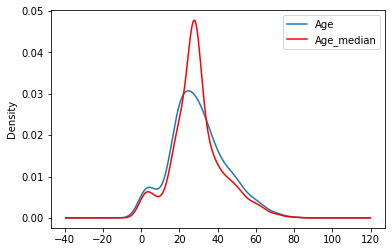

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline
# executed line by line and explaination is provided beside each line
fig = plt.figure() #returns object: Figure size 432x288 with 0 Axes>
ax= fig.add_subplot(111) #returns a border in which the data will be plotted

df1["Age"].plot(kind='kde', ax=ax) #age graph is shown in blue, 11th line has to be printed 
#kde is kernel density estimation, kind of graph likr bar, chart

df1.Age_median.plot(kind='kde', ax=ax, color= 'red') #age_median is shown, executed with 11th line

lines, labels = ax.get_legend_handles_labels() #must

ax.legend(lines, labels, loc='best') #this prints notation that blue line is age and red is age_median


#blue is age which was there in dataframe 
# red- age_median after replacing nan values

### Advantages and Disadvantages of mean/median imputation 

Advantages
* Easy to apply. Robust to outliers
* Faster way to obtain complete dataset

Disadvantages
* Change or distortion in original variance of data ( std deviation )
* 

Pathname:
/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/MeanMedianDay1

## 2. Random Sample Imputation 

* Consist of taking random observation from dataset. Using same observation, missing data will be filled.
* When it shoud be used? It assumes that data is missing completely random. NCAR (just like mean, median, mode)


In [55]:
df2= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv",
                 usecols=["Age","Fare","Survived"])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [56]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [57]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [58]:
#To create random value in age and replace null with it 

#fisrt remove na values in df2 so that the random sample shouldnt be null
#once the na values are removed use sample() to generate a sample value

df2["Age"].dropna().sample()
 
    #I get different result everytime I run this 
    

710    24.0
Name: Age, dtype: float64

In [62]:
#now I need to apply random ages in places of null 
# this can be achieved by passing the below statement inside sample of above statement
#with random_state 

df2["Age"].isnull().sum()
#this collects all the data where age is null. 
# we need to pass this data inside sample


177

In [64]:
df2["Age"].dropna().sample(df2["Age"].isnull().sum())
#this generates random values for the places of Age where it is null. If I re run it, the assigned random 
#age values will be changed. to avoid this, introduce random_state argument inside sample()

493    71.0
503    37.0
508    28.0
715    19.0
491    21.0
       ... 
90     29.0
151    22.0
203    45.5
436    21.0
483    63.0
Name: Age, Length: 177, dtype: float64

In [70]:
df2["Age"].dropna().sample(df2["Age"].isnull().sum(),random_state=0)
# this is the main part of sample imputer. pasting this in function

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [76]:
df2['Age'].isnull() #gather all the values which has null in Age column

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [77]:
# after gathering null values, get their indices using df2[].index
df2[df2['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [80]:
median1= df2.Age.median()
median1

28.0

df2.loc[df2[variable].isnull(),variable+ "_random"]=random_sample

* from age col-> pull out null values.
* pull out age_random column, which is new col made and has age column
* using loc, fetch rows which has age and age_random data from dataframe
* replace it with random_sample we generated in 4th line of code

In [81]:
#create function to replace null to random sample

def impute_nan(df, variable, median):
    df[variable+"_median"]= df[variable].fillna(median1) #for median one, new col is created as age_median
    
    df[variable+ '_random']= df[variable]#copying age values from Age column and pasting in this new col:Age_random
    
    #random sample to fill na
    random_sample= df2["Age"].dropna().sample(df2["Age"].isnull().sum(),random_state=0)
    
    #indices of random_sample should be same as indices of age_random
    #as pandas need to have same index in order to merge the dataset
    random_sample.index= df2[df2['Age'].isnull()].index
    #
    df2.loc[df2[variable].isnull(),variable+ "_random"]=random_sample

In [82]:
#calling function
impute_nan(df2, "Age", median1)
df2.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


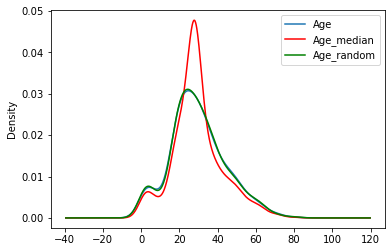

In [83]:
# plotting

fig = plt.figure() 
ax= fig.add_subplot(111) 

df2["Age"].plot(kind='kde', ax=ax) 

df2.Age_median.plot(kind='kde', ax=ax, color= 'red') 

df2.Age_random.plot(kind='kde', ax=ax, color= 'green') 

lines, labels = ax.get_legend_handles_labels() 

ax.legend(lines, labels, loc='best') 



Graph description: 

There are 3 lines age is showing in blue, and age_random in green. Both are falling in same place ie, overlapping. 

If we differentiate this with median: median data is distorted so much but there is no distortion in age_random with original age data. 

Data distortion is data variance. Much variance in median, no variance in random


### Advantages
1. no Distortin in variance
2. Easier implementation 

### Disadvantages
1. randomness won't work in every scenario 
ex: if there is many missing values

## 3. Capturing NaN values with new feature

* It works well if the data is missing not at random. MNAR


In [84]:
df3= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv",
                 usecols=["Age","Fare","Survived"])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [85]:
#create new col called Age_NaN. in this col, check if Age is null or not. 
#if age is present then 0, if there is null value 1. because we're checking if null val is present or not

df3['Age_NaN']= np.where(df3["Age"].isnull(),1,0)
df3

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [86]:
#After capturing the importance of null value, replacing it with median/mean

df3.Age.median()
#this is particularly used when we're implemeting model. I am not just replacing the null value.
# I am making it as 1(when there is null), keeping it as it is. and adding new feature as well. 
# then using up new feature(Age_NaN)


28.0

In [88]:
df3["Age"].fillna(df.Age.median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [91]:
#I have just filled na in last data. To make it permanent introduce inplace arg
df3["Age"].fillna(df.Age.median(),inplace=True)
df3
#check row 888, age value nan is replaced by 28 and Age_Nan is 1 that indicates that age was null before

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


### Advantages
* Easy to implement
* captures importance of missing value. Because whereever there is missing value, I am giving as one

### Disadvantages
* it creates additional features. Ex: if there are so many columns that has null values then for all those columns we need to create new features(col)

This will lead into curse of dimensionality

## 4. End of distribution imputation

We capture importance of NaN values which are in the end (far)of distribution 


End of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [93]:
df4= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv",
                 usecols=["Age","Fare","Survived"])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

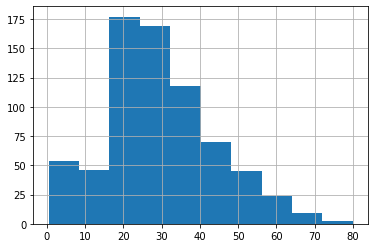

In [94]:
# end of distribution view

df4["Age"].hist()

<AxesSubplot:>

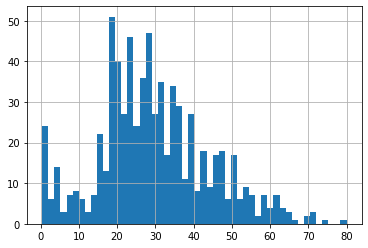

In [99]:
#bins : int or sequence, default 10
   # Number of histogram bins to be used. If an integer is given, bins + 1
   # bin edges are calculated and returned. If bins is a sequence, gives
   # bin edges, including left edge of first bin and right edge of last
   # bin. In this case, bins is returned unmodified

df4["Age"].hist(bins=50)

In [102]:
#central value
df4.Age.mean()

29.69911764705882

In [104]:
mean1= df4.Age.mean()
mean1

29.69911764705882

In [106]:
#3rd std dev

st1= df4.Age.std()
st1

14.526497332334044

In [108]:
#far end distribution 
#after 3rf standard deviation from mean value. That is to the right end + standard deviation. 
#refer google or look for image of std dev


std3= mean1+ 3*st1
std3

73.27860964406095

In [111]:
#putting it together

extreme= df.Age.mean() + 3* df4.Age.std() 

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

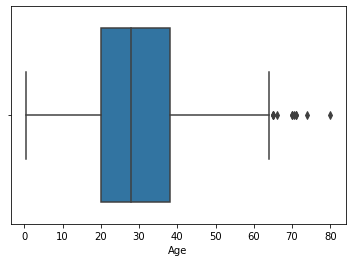

In [110]:
import seaborn as sns

sns.boxplot("Age", data= df4)

#black dots at right side are outliers

# that is why we have taken right side 3rd positive standard deviation as extreme

In [112]:
def impute_nan1(df, variable, median, extreme):
    df[variable+"_end_distribution"]= df[variable].fillna(extreme) #create new var, fill up nan with extreme
    df[variable].fillna(median,inplace=True) #fill na with median
    

In [114]:
impute_nan1(df4, 'Age', df.Age.median, extreme)


In [115]:
df4.head()

#nan values in the age has been replaced by median 

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [116]:
df4

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,<bound method NDFrame._add_numeric_operations....,23.4500,73.27861
889,1,26.0,30.0000,26.00000


In [117]:
df4.head(50)

# missing values in age_end has been replaced ny 73.27

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,<bound method NDFrame._add_numeric_operations....,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

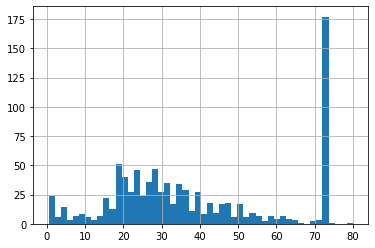

In [120]:
#df4["Age"].hist(bins=50)
df4["Age_end_distribution"].hist(bins=50)

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

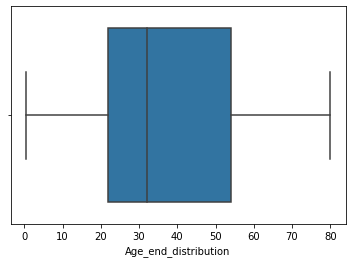

In [122]:
#drawing box plot

sns.boxplot("Age_end_distribution", data=df4)

#outliers have been removed


### Arbitrary value imputation

* It consist of replacing NaN by an Arbitrary value 
* This technique was derived from Kaggle competition

Arbitrary: random choice without any explaination or reason 

Arbitrary value which is used to replace a. shouldnt be more frequent

We can consider outliers which falls on extreme left (least outliers) 0 or extreme right (max outliers) 100 

In [3]:
df5= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv",
                usecols=["Age","Fare","Survived"])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
def arbitrary_Nan(df, variable):
    df[variable+'_zero']= df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)
    

In [7]:
arbitrary_Nan(df5, "Age")

df5.head(7)

#check row 5 for results

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0


<AxesSubplot:>

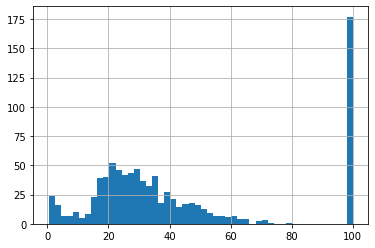

In [8]:
df5['Age_hundred'].hist(bins=50)

### Advantages
1. Easy to implement
2. Capture importance of missing values

### Disadvantages
1. Distorts original distribution of the variable
2. Hard to decide which one to use


* generally not used. can skip


## Handling categorical Feature

In [13]:
### Frequent categoty imputation

In [15]:
df6= pd.read_csv('/Users/melissavidiera/Downloads/housepricestrain.csv', 
                 usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df6.head()

#or loan.csv (same data)
#SalePrice is independant feature. That is we need to predict this var
# we have chosen these 4 columns because these 4 have missing data and are categorical features

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
df6.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
df6.shape

(1460, 4)

In [16]:
df6.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [17]:
df6.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [19]:
df6.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

In [22]:
# GarageType and BsmtQual has lesser missing values than Fireplace, we can impute missing values with most
#frequently appeared data as it wont distort the data 

#Computing frequency with every feature 
# first parameter(col) given in groupby will be transponsed as row 

df6.groupby(['BsmtQual'])['BsmtQual'].count()


BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [23]:
# so accordin to this code, most frequenrtus TA

df6.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

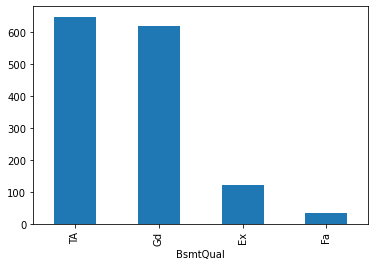

In [24]:

df6.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

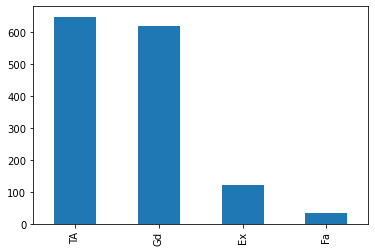

In [27]:
#instead of groupby 

df6['BsmtQual'].value_counts().plot.bar()

In [37]:
#value_counts doesnt give actual data value, so using index wit value_counts. 1st index will always give 
#one with highest count 
df6['BsmtQual'].value_counts().index[0]

'TA'

In [51]:
#we can use mode as well instead of value_counts
df6['BsmtQual'].mode()[0]


'TA'

<AxesSubplot:>

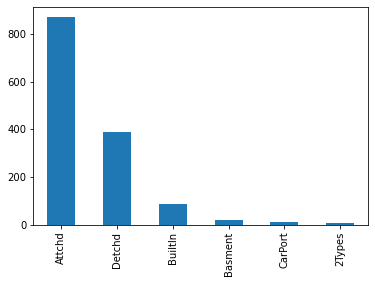

In [28]:
df6['GarageType'].value_counts().plot.bar()

In [36]:
df6.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType'>

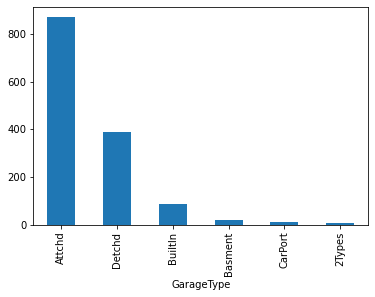

In [35]:
df6.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [34]:
df6.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False)

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu'>

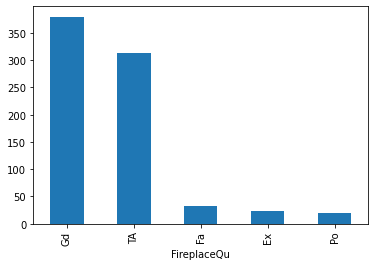

In [31]:
#FireplaceQu
df6.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [46]:
#impute function 

#first find the one most frquesnt category 

def frequent_impute(df, variable):
    most_frequent_category=  df[variable].value_counts().index[0] #calculate most freq
    df[variable].fillna(most_frequent_category, inplace=True) # fill null values with most freq

In [47]:
# before calling function, introduce for loop so that each and every time I need not to provide variabename 

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    frequent_impute(df6, feature)
    
#in 3rd line of fucntion I wrote like df['variable'] with quotes. I got error while running this cell not func

In [48]:
# function is executed and called. 
# checking df

df6.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
#check for null values to re check if all the null values have been replaced

df6.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

another way to write fucntion using mode

def frequent_impute(df, variable):

    most_frequent_category=  df[variable].mode()[0] #calculate most freq
    
    df[variable].fillna(most_frequent_category, inplace=True)


### Advantages

* Easy to implement
* Faster to implement


### Disadvantages

* Distorts the relationship. 
* Shouldnt be done when we have higher missing values 
* ex: Firplace up here has 47% missing values. Almost 50%. In this case, we just can not replace missing values with mostly occured data. 

### Adding a variable to capture NaN 

Most frequently used

In [59]:
df7= pd.read_csv('/Users/melissavidiera/Downloads/housepricestrain.csv', 
                 usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [62]:
df7['BsmtQual_Var']= np.where(df7['BsmtQual'].isnull(),1,0)
df7.head(20)
#if there is null value then replace it with 0, if there is some data then replace it with 1
#17th row

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [64]:
# here we have captured all the null values and assigned it in new col: this will be useful in future ref
#as well as we have replaced null values in BsmtQual col

most_frequent= df7['BsmtQual'].mode()[0]
df7['BsmtQual'].fillna(most_frequent,inplace= True)
df7.head(20)

#17th row, it was null it has been replaced with TA and BsmtQual_Var=1 (null)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [65]:
#doing same for FireplaceQu

df7['FireplaceQu_var']= np.where(df7['FireplaceQu'].isnull(),1,0)

most_frequent= df7['FireplaceQu'].mode()[0]
df7['FireplaceQu'].fillna(most_frequent,inplace= True)
df7.head()
#first value of FireplaceQu was NaN

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


* Suppose if we have many missing data more than 50% , replacing these with most frequent of other 45% doesn't make ay sense. 
* we just replace NaN with a new category. 

* So instead of considering this null value as one of the already existing category, we will consider all of this as a brand new value

In [67]:
df8= pd.read_csv('/Users/melissavidiera/Downloads/housepricestrain.csv', 
                 usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df8.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
def nan_new_category(df, variable):
    df[variable +'_newvar']= np.where(df[variable].isnull(),"Missing", df[variable]) 
    
    #where() 2nd arg takes- values for missing data. So if there is null then state it as "missing",
    #if not then just copy whatever the data in df[var] to this newcol 

    
#for loop to avoid calling function for each col 

for feature1 in ['BsmtQual','FireplaceQu','GarageType']:
    nan_new_category(df8, feature1)
    
df8.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [73]:
# I have created new feature with new catgory so I am deleted the old columns which has null values

df8= df8.drop(['BsmtQual','FireplaceQu','GarageType'], axis=1)

In [74]:
df8

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


### Handle Categorical Feature

* Categorical data are variables that contain label values rather than numeric values
* ex: pet: cat, dog
* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.


How to Convert Categorical Data to Numerical Data?
This involves two steps:

* Integer Encoding

As a first step, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called a label encoding or an integer encoding and is easily reversible.


* One-Hot Encoding
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

red,	green,	blue

1,		0,		0

0,		1,		0

0,		0,		1

Summarizing: each variable will be turned as matrix format

In [78]:
df9= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv")
df9.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df9.shape

(891, 12)

In [81]:
df10= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv", 
                 usecols=['Sex'])
df10.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [83]:
#one hot encoder is done using get_dummies() in pandas

pd.get_dummies(df10).head()

#if there are n features then OHE creates n-1 sub features

#this further creates matrix of thatfeature(sub feature)like data whereeach category is notated using binary.
#Uses alphabetical order
# female 0 1
#male 1 0

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [84]:
#arg drop_first. if I make it true then the first feature sex_female will be dropped
#this is done to save computation time/ space because just with sub feature sex_male I can understand if its 
#male or female. i.e., sex_male= 1= male. sex_male=0= female

pd.get_dummies(df10, drop_first= True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [87]:
df11= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv", 
                 usecols=['Embarked'])
df11['Embarked'].unique()

#error: df11.unique() 'DataFrame' object has no attribute 'unique'

#in o/p we can see 4 unique values. including nan. 


array(['S', 'C', 'Q', nan], dtype=object)

In [89]:
#dropping nan frm df11 which has embarked col

df11.dropna(inplace=True)
df11.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [92]:
pd.get_dummies(df11).head(10) 

# embarked_c = 001
#embarked_q= 100
#embarked_s= 001
#even if i drop first value, I can still recognise the value of 2nd 3rd feature

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [93]:
pd.get_dummies(df11, drop_first= True).head(10) 

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


### Advantages


### Disadvantages
* Creates so many people. 
* ex: if I have 100 unique pincodes and some of the values are missing. If I apply OHE, then extra 99 features will be created
* Curse of Dimensionality 

### How to perform OHE for the dataset with so many features

In [94]:
df12= pd.read_csv('/Users/melissavidiera/Downloads/mercedestrain.csv')
df12.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df12= pd.read_csv('/Users/melissavidiera/Downloads/mercedestrain.csv', 
                  usecols =['X0','X1','X2','X3','X4','X5','X6'])
df12.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [100]:
for i in df12.columns:
    print(df12[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

In [106]:
df12['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [102]:
df12['X0'].unique()

#there are so many categories within X0

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [104]:
print(len(df12['X0'].unique()))

47


In [105]:
for i in df12.columns: #for x0 till x6
    print(len(df12[i].unique())) 
    
    #we have so many categories here. we cant use classic OHE in this case

47
27
44
7
4
29
12


According to paper: Winning the KDD Cup Orange Challenge with Ensemble Selection

* They have proven good result while top 10 most frequent categores are considered and rest of others have been dropped
* OHE is done for these top 10 features while other features are dropped
* ex: df12['X0;] has 47 categories as shown above
* but after z, categories have lesser frequency

In [108]:
df12['X0'].value_counts().sort_values(ascending= False).head(10) #top 10

#apply One hot encoder for first 10

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [111]:
# pick index name 

list_10=df12['X0'].value_counts().sort_values(ascending= False).head(10).index
list_10= list(list_10)
list_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [113]:
for categories in list_10:
    df12[categories]= np.where(df12['X0']== categories,1,0) 
    
df12[list_10]

#this has all the categories of X0. 

,z,ak,y,ay,t,x,o,f,n,w
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0
4206,0,1,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0


In [115]:
#along with all the top10  categories apend X0 as well to view
list_10.append('X0')
df12[list_10]

#so ak is in top 10 and is in row label. now cheching column data of X0: ak is also present 
#in that row ak and col ak- the value is 1
# col X0: k, az, j, al is not in top 10, then all the values are 0 in this case

,z,ak,y,ay,t,x,o,f,n,w,X0,X0
0,0,0,0,0,0,0,0,0,0,0,k,k
1,0,0,0,0,0,0,0,0,0,0,k,k
2,0,0,0,0,0,0,0,0,0,0,az,az
3,0,0,0,0,0,0,0,0,0,0,az,az
4,0,0,0,0,0,0,0,0,0,0,az,az
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak,ak
4205,0,0,0,0,0,0,0,0,0,0,j,j
4206,0,1,0,0,0,0,0,0,0,0,ak,ak
4207,0,0,0,0,0,0,0,0,0,0,al,al


In [ ]:
#now making it for 10 top 


### Handling categorical features with many categories

#### Count of Frequency Encoding
* applied where we have many categories( high cardinality) 
* we replace label od categorical variable by the count this is the amount of times each label appears in the dataset.
* OHE creates multiple categories. i.e, for n categories, it creates n-1 categories  to overcome this we use count of frequency technique



In [135]:
data= pd.read_csv('/Users/melissavidiera/Downloads/mercedestrain.csv',
                 usecols= ['X1','X2'])  #x1 n x2 havehigh cardinality
data.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [136]:
data.shape

(4209, 2)

In [137]:
#why not to use OHE in this case

pd.get_dummies(data).shape

#initially it has 2 columns, after OHE it has 71. 69 columns are added

(4209, 71)

In [138]:
#

len(data['X1'].unique())

27

In [139]:

len(data['X2'].unique())

44

In [140]:
for col in data.columns[0:]:
    print(col, ":", len(data[col].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels


In [141]:
data.X2.value_counts()
#this gives moe how mnay times teh category has been repeated/ count of that dataset in descending order

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
al       5
an       5
q        5
av       4
ah       4
p        4
au       3
am       1
j        1
af       1
l        1
aa       1
c        1
o        1
ar       1
Name: X2, dtype: int64

In [142]:
# convert this into dictionary format so that we can use dict to map data in later stage

df_frequency_map= data.X2.value_counts().to_dict()
df_frequency_map

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'an': 5,
 'q': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'j': 1,
 'af': 1,
 'l': 1,
 'aa': 1,
 'c': 1,
 'o': 1,
 'ar': 1}

map()

map(fun, iter)

Parameters :

* fun : It is a function to which map passes each element of given iterable.
* iter : It is a iterable which is to be mapped.

In [144]:
data.head(100)

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n
...,...,...
95,b,m
96,l,as
97,aa,as
98,b,m


In [145]:
#apply whole dictionary mapping into X2
# we have to replace the value of X2 into thecount 
#ex: first val od X2 is at and its count in dictionary is 6. so I need to display 6 instead of at

data.X2 =data.X2.map(df_frequency_map)
data.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


### Advantages
* Simple to implemetn
* Do not increase the feture dimensional space. No curse of dimensional


### Disadvantages
* If some of variables have label count is same then the variable will be replaced by same count (ex: at ab whose label count is 500 for both) Here we lose some important info
* Add somewhat arbitrary numbers, and therefore weights to different labels. This may not be related to their predictive power

### Ordinal Number Encoding

* ordinal meaning- a number that shows the order or position of something in a series
* How categories can be arranged in a way so that we can assign ranks
* Ex: grading system. A, B, C, F
* ex2: Experience ofbatsman. BatsmanA has 10 yrs, more experience and handle different situation: rank 1, BatsmanB has 5 years exp, rank 2 etc
* ex3: weekdays and weekends. take value of days Mon Tue.. Sun. Ranking it like Sat1 sun-2 mon 7 as per one's liking


### Ordinal number encoding for encoding days in a week

* generate dates using datetime.timedelta
* Generate Days for all the dates. Weekday using day_name()
* Create dictionary where we have ranked each day of a week from 0 to 7
* Create new col called Weekday_ordinal and map dictionary to Weekday col

In [3]:

import datetime

#https://www.w3schools.com/python/python_datetime.asp

In [7]:
today_date= datetime.datetime.today()
today_date

datetime.datetime(2022, 2, 24, 5, 21, 13, 294194)

In [9]:
#create 15 day data and take out day value(mon, tue..)

datetime.timedelta(4) #this func calculate difference btw 2 dates

datetime.timedelta(days=4)

In [10]:
today_date - datetime.timedelta(4) # 24th - 4= 20th feb 

datetime.datetime(2022, 2, 20, 5, 21, 13, 294194)

In [22]:
#List comprehension to create 15 days data

[today_date - datetime.timedelta(x) for x in range(0,15)]

[datetime.datetime(2022, 2, 24, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 23, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 22, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 21, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 20, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 19, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 18, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 17, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 16, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 15, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 14, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 13, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 12, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 11, 5, 21, 13, 294194),
 datetime.datetime(2022, 2, 10, 5, 21, 13, 294194)]

In [23]:
#create variable and save 15 day data here and convert into dataframe

days = [today_date - datetime.timedelta(x) for x in range(0,15)]
data= pd.DataFrame(days)
data.columns=["Days"]

In [24]:
data

,Days
0,2022-02-24 05:21:13.294194
1,2022-02-23 05:21:13.294194
2,2022-02-22 05:21:13.294194
3,2022-02-21 05:21:13.294194
4,2022-02-20 05:21:13.294194
5,2022-02-19 05:21:13.294194
6,2022-02-18 05:21:13.294194
7,2022-02-17 05:21:13.294194
8,2022-02-16 05:21:13.294194
9,2022-02-15 05:21:13.294194


In [28]:
# to fetch days from data 
#old verion code- data['Days'].dt.weekday_name
data['Days'].dt.day_name()

0      Thursday
1     Wednesday
2       Tuesday
3        Monday
4        Sunday
5      Saturday
6        Friday
7      Thursday
8     Wednesday
9       Tuesday
10       Monday
11       Sunday
12     Saturday
13       Friday
14     Thursday
Name: Days, dtype: object

In [30]:
data['Days'].dt.day

0     24
1     23
2     22
3     21
4     20
5     19
6     18
7     17
8     16
9     15
10    14
11    13
12    12
13    11
14    10
Name: Days, dtype: int64

In [32]:
data['Days'].dt.year

0     2022
1     2022
2     2022
3     2022
4     2022
5     2022
6     2022
7     2022
8     2022
9     2022
10    2022
11    2022
12    2022
13    2022
14    2022
Name: Days, dtype: int64

In [33]:
data['Days'].dt.month

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
Name: Days, dtype: int64

In [34]:
data['Days'].dt.minute

0     21
1     21
2     21
3     21
4     21
5     21
6     21
7     21
8     21
9     21
10    21
11    21
12    21
13    21
14    21
Name: Days, dtype: int64

In [36]:
data['Days'].dt.minute

0     21
1     21
2     21
3     21
4     21
5     21
6     21
7     21
8     21
9     21
10    21
11    21
12    21
13    21
14    21
Name: Days, dtype: int64

In [39]:
#getting back to code, create new col 'Weekday' and fetch the dayname against the "Days"

data['Weekday']= data['Days'].dt.day_name()
data.head()

,Days,Weekday
0,2022-02-24 05:21:13.294194,Thursday
1,2022-02-23 05:21:13.294194,Wednesday
2,2022-02-22 05:21:13.294194,Tuesday
3,2022-02-21 05:21:13.294194,Monday
4,2022-02-20 05:21:13.294194,Sunday


In [40]:
#create dictionary create key value pair. 

dictionary= {'Monday':1, "Tuesday":2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7 }

dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [44]:
#map 

data['Weekday'].map(dictionary)

0     4
1     3
2     2
3     1
4     7
5     6
6     5
7     4
8     3
9     2
10    1
11    7
12    6
13    5
14    4
Name: Weekday, dtype: int64

In [43]:
#create new column
data['weekday_ordinal']= data['Weekday'].map(dictionary)

,Days,Weekday,weekday_ordinal
0,2022-02-24 05:21:13.294194,Thursday,4
1,2022-02-23 05:21:13.294194,Wednesday,3
2,2022-02-22 05:21:13.294194,Tuesday,2
3,2022-02-21 05:21:13.294194,Monday,1
4,2022-02-20 05:21:13.294194,Sunday,7
5,2022-02-19 05:21:13.294194,Saturday,6
6,2022-02-18 05:21:13.294194,Friday,5
7,2022-02-17 05:21:13.294194,Thursday,4
8,2022-02-16 05:21:13.294194,Wednesday,3
9,2022-02-15 05:21:13.294194,Tuesday,2


In [45]:
data

,Days,Weekday,weekday_ordinal
0,2022-02-24 05:21:13.294194,Thursday,4
1,2022-02-23 05:21:13.294194,Wednesday,3
2,2022-02-22 05:21:13.294194,Tuesday,2
3,2022-02-21 05:21:13.294194,Monday,1
4,2022-02-20 05:21:13.294194,Sunday,7
5,2022-02-19 05:21:13.294194,Saturday,6
6,2022-02-18 05:21:13.294194,Friday,5
7,2022-02-17 05:21:13.294194,Thursday,4
8,2022-02-16 05:21:13.294194,Wednesday,3
9,2022-02-15 05:21:13.294194,Tuesday,2


### Count or Frequency Encoding 


Data Set Information: adult.data

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.



In [89]:
train_set= pd.read_csv('/Users/melissavidiera/Downloads/adult.data', header= None,index_col= None )
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
train_set.shape

(32561, 15)

In [91]:
# check which column has categorical fetures. in this DS, 1,3,5,6,7,8,13

#consider col of index 1, and check unique

train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [92]:
# check which column has categorical fetures. in this DS, 1,3,5,6,7,8,9,13

columns= [1,3,5,6,7,8,9,13]

In [93]:
train_set= train_set[columns]

In [94]:
# name all columns
train_set.columns=['Employment','Degree','Status','Designation','Family_job','Race','Sex','Country']

In [95]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [96]:
#check what are the unique features (data values) are there in employement 

train_set['Employment'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [97]:
# use len() for above func, to know how many features are there in Employment col

len(train_set['Employment'].unique())

9

In [98]:
# do this for all the columns. 
for features in train_set.columns:  # krish- for features in train_set.columns[:]: 
    print(features, ":" , len(train_set[features].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [99]:
#tke country col and apply FREQUENCY ENCODING

#check how many times each country has been appeared
# we have ?. apply any imputing technique 

train_set["Country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [100]:
#convert this into dictioary 

train_set["Country"].value_counts().to_dict()
# here US will be replaced by 29170, India will be replaced by 100 and so on

#once I get this data, look for NaNvalues. In this case we have ?. that has to be replaced by any other technique
#most frequently occured, etc

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [102]:
country_map= train_set["Country"].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [103]:
# replace country column with mapped value. Here not creating new col 
#use map again 

train_set["Country"]= train_set["Country"].map(country_map)

train_set.head(20)

#if we get Nan in country, run all the codes again 


,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


### Advantages of Count/frequency encoding

* Easy
* (imp) no increase in feature space

### Disadvantages 

* it provde same weight if frequencies are same.  
Ex: if India and Cuba has same frequency, both are provided with same frequency data 100


### Target Guided Ordinal Encoding

1. Ordering labels according to the target. 
2. i.e, replace the labels by the joint probability of being 0 or 1 (classification)


In [104]:
df13= pd.read_csv("/Users/melissavidiera/Downloads/Feature-Engineering-Live-sessions-master/titanic.csv"
            ,usecols=["Cabin","Survived"])
df13.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [107]:
#in cabin we have nan. replace it with some new var/ or any other technique

df13["Cabin"].fillna('Missing', inplace= True)
df13.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [108]:
df13["Cabin"].unique()

#here we have so many entries. C D A B etc. 
#ex: C23. so number might be different as it is room number but block is C

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [109]:
# to get the first letter of data entry
# 1. Covert it into type string 2. get 1st letter usung str[0]
#make 1st character as a Category 

df13["Cabin"].astype('str').str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [111]:
#now assign this data in the actual dataframe of Cabin column
df13["Cabin"]= df13["Cabin"].astype('str').str[0]
df13.head(20)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [112]:
df13["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [116]:
# to find the number of peope survided per cabin 
# 1. using groupby, which makes cabin as row label (it is also col label) wrt Survived col 
#2. calculate mean. 

df13.groupby(['Cabin'])["Survived"].mean()
# 46% people survived in cabin A. in T no one survived


Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [118]:
#sorting

df13.groupby(['Cabin'])["Survived"].mean().sort_values(ascending= False)

Cabin
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [119]:
# for the same code, get index using .index. store the index values sp that we can map

ordinal_labels= df13.groupby(['Cabin'])["Survived"].mean().sort_values(ascending= False).index
ordinal_labels

Index(['D', 'E', 'B', 'F', 'C', 'G', 'A', 'M', 'T'], dtype='object', name='Cabin')

enumerate()

Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. 

This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.

enumerate() takes the labels as 1st argument. it goes through the label( in his case it is Ordinal_labels)

it calculates weight of each label and assign the rank/number which starts from 0 (as providedin 2nd arg)

In [121]:
enumerate(ordinal_labels,0)
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.

In [123]:
ordinal_labels2= {k:i for i, k in enumerate(ordinal_labels,0) }
ordinal_labels2
#{} makes dictionary k- key and i iterator. use for loop 
#This enumerated object can then be used directly for loops 
#or converted into a list of tuples using the list() method.
# output of enumerate is i,k 

# T has higher value so it ranks T as highest 8 

#we can do it manually as well. creating dctionary for each label like I did for weekday

{'D': 0, 'E': 1, 'B': 2, 'F': 3, 'C': 4, 'G': 5, 'A': 6, 'M': 7, 'T': 8}

In [127]:
#create new col
df13['Cabin_ordinal_labels']= df13["Cabin"].map(ordinal_labels2)
df13.head(20)

,Survived,Cabin,Cabin_ordina_labels,Cabin_ordinal_labels
0,0,M,7,7
1,1,C,4,4
2,1,M,7,7
3,1,C,4,4
4,0,M,7,7
5,0,M,7,7
6,0,E,1,1
7,0,M,7,7
8,1,M,7,7
9,1,M,7,7


In [128]:
#due to typo i created extra col. dropping. 

df13.drop(['Cabin_ordina_labels'],axis=1)

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,7
1,1,C,4
2,1,M,7
3,1,C,4
4,0,M,7
...,...,...,...
886,0,M,7
887,1,B,2
888,0,M,7
889,1,C,4
